# Auswertung Wädenswil

## Vorbereitung

Zuerst importiere ich die nötigen Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

Ich setze die Option, dass ich später in den Dataframes alle Angaben sehe. Warnungen, dass gewisse Funktionen nach Updates nicht mehr funktionieren könnten, schalte ich der Leserfreundlchkeit halber aus.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

Danach importiere ich die beiden Hauptfiles. Jenes mit den Vorstössen und jenes mit den Namen und Parteien der Politiker/innen.

In [3]:
path2 = "All_Datas/Parlamentarier_Wädenswil.csv"
df_parlamentarier = pd.read_csv(path2)
df_parlamentarier.head(3)

,Name,Partei,ID-Politiker,Geschlecht
0,Hanspeter Andreoli,BFPW,1,m
1,Bachmann Andrea,Grüne,2,w
2,Gabi Bachmann,EVP,3,w


In [4]:
path = "All_Datas/daten_Wädenswil.csv"
df = pd.read_csv(path)
df.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']","['Reiter Ulrich', 'Rita Hug', 'Claudia Bühlmann']",1
1,Postulat betreffend Berücksichtigung der IAO-Kernübereinkommen im städtischen Beschaffungswesen,Postulat,Beantwortet,19. Juni 2008,['Willy Rüegg'],['Willy Rüegg'],2
2,Interpellation betreffend Konzept für den Erhalt der Bienenvölker,Interpellation,Erledigt,17. Dezember 2012,"[' Baer Charlotte', '', 'Jürg Wuhrmann (keine Funktion)\n Ivano Coduri (keine Funktion)\n Erich Schärer (keine Funktion)\n Marcel Bättig (keine Funktion)\n Christoph Lehmann (keine Funktion)\n Adrian Stocker (keine Funktion)\n Pascal Rubin (keine Funktion)\n Christina Zurfluh Fraefel (keine Funktion)\n Hanspeter Andreoli (keine Funktion)\n Sandy Bossert (keine Funktion)', '', '', '', '', '', '', '', '', '']","['Baer Charlotte', 'Jürg Wuhrmann', 'Ivano Coduri', 'Erich Schärer', 'Marcel Bättig', 'Christoph Lehmann', 'Adrian Stocker', 'Pascal Rubin', 'Christina Zurfluh Fraefel', 'Hanspeter Andreoli', 'Sandy Bossert']",3


Damit ich die beiden Listen später mergen kann, muss ich aus den Namenslisten in der Spalte Namen-neu des Vorstoss-Dataframes die einzelnen Elemente herausziehen. Ich will also eine separate Zeile für jede Person, die an einem Vorstoss beteilitgt war. Dazu mache ich eine Kopie des Dataframes, um nichts zu überschreiben. Danach zerteile ich mit der lambda-Funktion die Liste in einzelne Elemente. Und zwar immer dann, wenn ein Komma kommt. Mit der Funktion .explode teile ich die definierten Namen in der Liste schliesslich in einzelne Zeilen auf.

In [5]:
df_vorstoesse = df.copy()
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].apply(lambda x: x if pd.isna(x) else x.split(','))
df_vorstoesse = df_vorstoesse.explode('Namen-neu')
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",['Reiter Ulrich',1
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",'Rita Hug',1
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",'Claudia Bühlmann'],1


Nun habe ich für alle Personen, die an einem Vorstoss beteiligt waren, eine einzelne Zeile. Um sie mit der Namensliste mergen zu können, müssen die Namen identisch sein. Ich muss also noch sämtliche Klammern und Anführungszeichen eliminieren. Das mache ich mit Hilfe von Regex.

In [6]:
df_vorstoesse['Namen-neu'] = df_vorstoesse['Namen-neu'].str.replace(r"[\[\]']|''", '').str.strip()
df_vorstoesse.head(3)

,Titel,Geschaeftsart,Status,Datum,Namen,Namen-neu,ID-Vorstoss
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",Reiter Ulrich,1
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",Rita Hug,1
0,Interpellation betreffend Ausbau Bahnhof Wädenswil,Interpellation,Erledigt,2. April 2018,"[' Reiter Ulrich', '', 'Rita Hug (Erstunterzeichner/in)\n Claudia Bühlmann (Mitunterzeichner/in)', '']",Claudia Bühlmann,1


Als nächstes will ich die beiden Listen so zusammenfügen, dass ich mit den IDs der Politiker und der Vorstösse arbeiten kann. So kann ich verhindern, dass sich Fehler einschleichen, falls zwei Politiker/innen gleich heissen. Ich merge die beiden Listen zur df_ID.

In [7]:
df_ID = df_vorstoesse.merge(df_parlamentarier, left_on='Namen-neu', right_on='Name', how='left')[['ID-Vorstoss', 'ID-Politiker']]

In [8]:
df_ID.head(5)

,ID-Vorstoss,ID-Politiker
0,1,87
1,1,56
2,1,16
3,2,92
4,3,5


Jetzt habe ich die Grundlage geschaffen, um mit den Auswertungen beginnen zu konnen.

## 1. Welche Parteien reichen am häufigsten Vorstösse ein?

Als erstes merge ich die Dataframes df_ID und df_parlamentarier so, dass ich die Parteien pro Vorstoss sehe.

In [9]:
df_parteien = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_parteien.head(5)

,Partei,ID-Vorstoss
0,Grüne,1
1,SP,1
2,Grüne,1
3,SP,2
4,SVP,3


Danach gruppiere ich die Daten und schaue, dass es dank der Funktion .nunique() die Partei nur einmal zählt, wenn mehrere Politiker/innen der selben Partei an einem Vorstoss beteiligt sind. Ich will hier ja wissen, welche Partei - und nicht welche Person - wie oft an einem Vorstoss beteiligt war. Technisch gesehen, zähle ich also eigentlich die Anzahl verschiedener Vorstoss-IDs, an denen eine Partei beteiligt war.

In [10]:
partei_count = df_parteien.groupby('Partei')['ID-Vorstoss'].nunique().sort_values(ascending=False).reset_index()
partei_count.columns = ['Partei', 'Anzahl_Vorstoesse']
partei_count

,Partei,Anzahl_Vorstoesse
0,SP,186
1,Grüne,116
2,FDP,111
3,SVP,91
4,Die Mitte,67
5,GLP,58
6,BFPW,53
7,EVP,49
8,EDU,19


Nun will ich das Resultat in einem Säulendiagramm plotten. Dies auch gleich mit den entsprechenden Parteifarben.

In [11]:
partei_farben = {
    'SP': 'red',
    'FDP': 'blue',
    'BFPW': 'grey',
    'Die Mitte': 'orange',
    'SVP': 'yellow',
    'EVP': 'gold',
    'Grüne': 'lime',
    'GLP': 'darkgreen',
    'EDU': 'darkred'
}

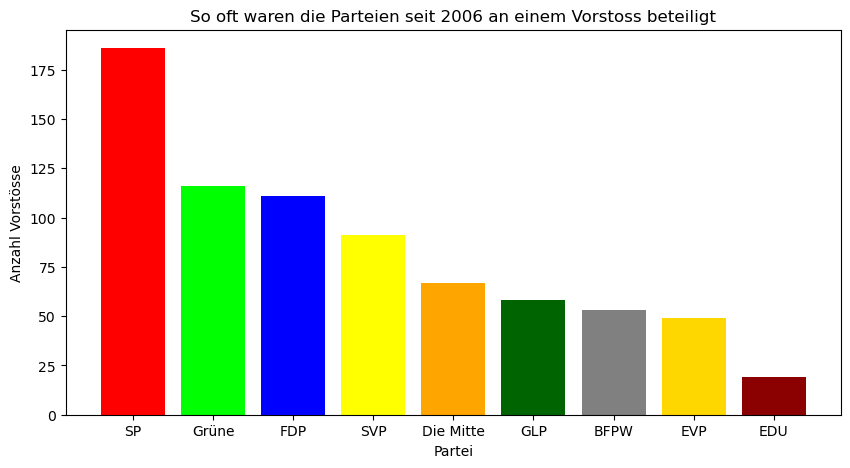

In [12]:
plt.figure(figsize=(10,5))
plt.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=[partei_farben[partei] for partei in partei_count['Partei']])
plt.title('So oft waren die Parteien seit 2006 an einem Vorstoss beteiligt')
plt.xlabel('Partei')
plt.ylabel('Anzahl Vorstösse')
plt.show()

SP, Grüne und FDP waren also am meisten an Vorstössen beteiligt. Um das etwas einordnen zu können, will ich auch die Anzahl Sitze der Parteien im Parlament ausfindig machen. Ich habe anhand der Liste, die ich von der Stadt erhalten das csv-File "Parteistärke_Wädenswil" gemacht und importiere es nun.

In [13]:
path = "All_Datas/Parteistärke_Wädenswil.csv"
df_parteistaerke = pd.read_csv(path)
df_parteistaerke.set_index('Jahr', inplace=True)
df_parteistaerke.head(10)

,Die Mitte,EVP,FDP,BFPW,GLP,Grüne,SP,SVP,EDU
Jahr,,,,,,,,,
2006,4,3,6,3,0,3,7,8,1
2010,4,2,5,2,1,4,6,10,1
2014,4,2,6,2,3,3,6,8,1
2018,4,3,6,2,2,4,7,6,1
2022,4,2,6,1,3,5,6,8,0


Um es grafisch sinnvoll zeigen zu können, berechne ich die durchschnittliche Sitzzahl über die letzten 5 Legislaturen hinweg für jede Partei.

In [14]:
parteistaerke_durchschnitt = df_parteistaerke.mean().sort_values(ascending=False)
parteistaerke_durchschnitt

SVP          8.0
SP           6.4
FDP          5.8
Die Mitte    4.0
Grüne        3.8
EVP          2.4
BFPW         2.0
GLP          1.8
EDU          0.8
dtype: float64

Und plotte das Ganze ebenfalls als Balkendiagramm mit den Parteifarben.

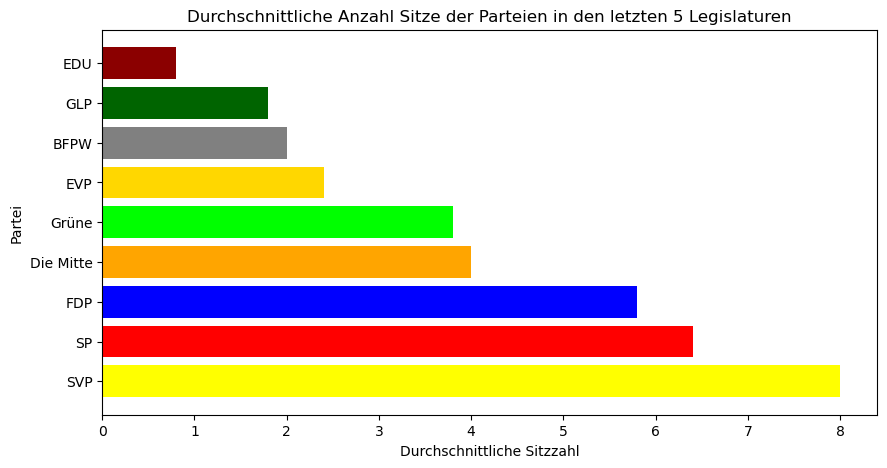

In [15]:
plt.figure(figsize=(10,5))
plt.barh(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt.values, color=[partei_farben[partei] for partei in parteistaerke_durchschnitt.index])
plt.title('Durchschnittliche Anzahl Sitze der Parteien in den letzten 5 Legislaturen')
plt.xlabel('Durchschnittliche Sitzzahl')
plt.ylabel('Partei')
plt.show()

Ich möchte nun auf einen Blick erkennbar machen, dass die SVP zwar am meisten Sitze hat, jedoch vergleichsweise nur sehr wenig Vorstösse einreicht. Um beide Auswertungen in einer Grafik anzuzeigen, verwende ich subplots. 

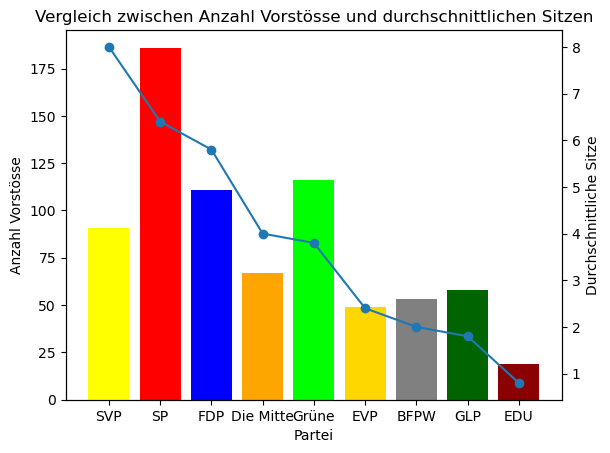

In [16]:
# Zuerst definiere ich die Art der Grafik und die erste Achse - und sage, dass es noch eine zweite gibt.
fig, ax1 = plt.subplots()

# Hier definiere ich die Achse mit den durchschnittlichen Sitzen - es soll später eine Linie mit Markern sein
# Weil ich auf den y-Achsen zwei verschieden grosse Werte habe, brauche ich unterschiedliche Skalen.
ax2 = ax1.twinx()
# Die Linie soll blau sein
color = 'tab:blue'
# Ich definiere den Titel der Achse
ax2.set_ylabel('Durchschnittliche Sitze')
# Nun definiere ich, was es mir eigentlich anzeigen soll - und dass ich einen blauen, runden Marker will
ax2.plot(parteistaerke_durchschnitt.index, parteistaerke_durchschnitt, color=color, marker='o')

# Hier setze ich die Farben der Parteien
color = [partei_farben[partei] for partei in partei_count['Partei']]
# Ich definiere die Achsen
ax1.set_xlabel('Partei')
ax1.set_ylabel('Anzahl Vorstösse')
# Und sage auch hier, was es mir eigentlich anzeigen soll. Die Anzahl Vorstösse nach Partei.
ax1.bar(partei_count['Partei'], partei_count['Anzahl_Vorstoesse'], color=color)

# Zum Schluss setze ich noch einen Titel
plt.title('Vergleich zwischen Anzahl Vorstösse und durchschnittlichen Sitzen')
plt.show()

Mich interessiert als Nächstes, wie oft eine Partei alleine einen Vorstoss einreicht und wie oft Politiker/innen aus mehreren Parteien an einem Vorstoss beteiligt sind. Ich erstelle dazu ein neues Dataframe mit den Spalten "Einzeln" und "Zusammen" und definiere als erstes einen For-Loop für die Parteien. Dazu reduziere ich mit .unique() zuerst sämtliche doppelte Partei-Vorstoss-Kombinationen. Danach schaue ich, ob die Vorstoss-ID nur einmal vorkommt. Das heisst nämlich, dass nur eine Partei beteiligt ist - wenn sie mehrmals vorkommt, sind noch andere Parteien vorhanden.

In [17]:
df_beteiligung_parteien = pd.DataFrame(columns=['Partei', 'Einzeln', 'Mit anderen Parteien'])

for partei in df_parteien['Partei'].unique():
    einzel = 0
    zusammen = 0

    for vorstoss_id in df_parteien[df_parteien['Partei'] == partei]['ID-Vorstoss'].unique():
        if len(df_parteien[df_parteien['ID-Vorstoss'] == vorstoss_id]) == 1:
            einzel += 1
        else:
            zusammen += 1

    df_beteiligung_parteien = df_beteiligung_parteien.append({'Partei': partei, 'Einzeln': einzel, 'Mit anderen Parteien': zusammen}, ignore_index=True)

df_beteiligung_parteien

,Partei,Einzeln,Mit anderen Parteien
0,Grüne,25,91
1,SP,61,125
2,SVP,24,67
3,FDP,18,93
4,BFPW,5,48
5,GLP,23,35
6,EVP,12,37
7,Die Mitte,20,47
8,EDU,0,19


Fazit Kapitel 1: Die linken Parteien SP und Grüne reichen in Wädenswil am meisten Vorstösse ein. Die SVP ist eher zurückhaltend, obwohl sie am meisten Parlamentarier/innen im Parlament hätte.

## 2. Wie erfolgreich sind die Parteien mit ihren Vorstössen?

Zuerst merge ich die Dataframes so zusammen, dass ich die Parteien, die Vorstoss-ID, den Status und die Geschäftsart habe.

In [18]:
df_erfolgreich = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','ID-Vorstoss']]
df_erfolg_alle = df_erfolgreich.merge(df_vorstoesse, left_on = 'ID-Vorstoss', right_on='ID-Vorstoss', how='right')[['ID-Vorstoss','Partei','Status','Geschaeftsart']].drop_duplicates()
df_erfolg_alle.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
0,1,Grüne,Erledigt,Interpellation
1,1,SP,Erledigt,Interpellation
9,2,SP,Beantwortet,Postulat
10,3,SVP,Erledigt,Interpellation
12,3,FDP,Erledigt,Interpellation


Um den Erfolg einer Partei mit einem Vorstoss zu messen, muss ich zuerst definieren, was überhaupt erfolgreich bedeutet und was nicht. Das mache ich über den Status der Geschäftsarten. Zuerst muss ich also mal schauen, was ich überhaupt für Geschäftsarten habe.

In [19]:
df_vorstoesse['Geschaeftsart'].unique()

array(['Interpellation', 'Postulat', 'Anfrage', 'Kleine Anfrage',
       'Motion', 'Dringliche Interpellation', 'Petition', 'Erklärung'],
      dtype=object)

Sicher ist, dass bei dieser Auswertung Interpellationen, Anfragen und Erklärungen keine Rolle spielen. Über diese wird nicht abgestimmt - es kann also weder Erfolg noch Nicht-Erfolg geben. Deshalb beschränkt sich diese Auswertung auf Motionen, Postulate und parlamentarische Initiativen. Ich filtere meine Daten entsprechend.

In [20]:
df_erfolg = df_erfolg_alle[df_erfolg_alle['Geschaeftsart'].isin(['Motion', 'Postulat', 'Petition', 'Dringliche Interpellation'])]
df_erfolg.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
9,2,SP,Beantwortet,Postulat
131,4,Grüne,Abgeschrieben,Postulat
132,4,SP,Abgeschrieben,Postulat
396,12,Die Mitte,Nicht überwiesen,Postulat
615,18,EVP,Nicht überwiesen,Postulat


Um zu sehen, was die möglichen Status sind, zeige ich mir diese mal an.

In [21]:
df_erfolg_alle['Status'].unique()

array(['Erledigt', 'Beantwortet', 'Abgeschrieben', 'Nicht überwiesen',
       'Eingereicht', nan, 'Abgelehnt', 'Rückzug', 'In Bearbeitung',
       'Pendent Legislative'], dtype=object)

Ich mache zwei Listen. Eine mit den Begriffen, die für Erfolg stehen, eine mit Begriffen, die für Nicht-Erfolg stehen.

In [22]:
erfolgreich = ['Abgeschrieben','Beantwortet']
nicht_erfolgreich = ['Abgelehnt','Rückzug', 'Nicht überwiesen']

Die Begriffe "Erledigt", "Pendent Legislative" und "In Bearbeitung" lasse ich bewusst weg, da er nichts über Efolg oder Nicht-Erfolg aussagt. 

In [23]:
df_erfolg_gefiltert = df_erfolg[-df_erfolg['Status'].isin(['Erledigt','Pendent Legislative'])]
df_erfolg_gefiltert.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart
9,2,SP,Beantwortet,Postulat
131,4,Grüne,Abgeschrieben,Postulat
132,4,SP,Abgeschrieben,Postulat
396,12,Die Mitte,Nicht überwiesen,Postulat
615,18,EVP,Nicht überwiesen,Postulat


Nun schaue ich, wie oft ein Begriff aus welcher Liste bei welcher Partei vorkommt.

In [24]:
df_erfolg_gefiltert = df_erfolg_gefiltert.copy()
df_erfolg_gefiltert['Erfolgreich'] = df_erfolg_gefiltert['Status'].isin(erfolgreich)
df_erfolg_gefiltert['Nicht Erfolgreich'] = df_erfolg_gefiltert['Status'].isin(nicht_erfolgreich)
df_parteien_erfolg = df_erfolg_gefiltert.groupby('Partei')[['Erfolgreich', 'Nicht Erfolgreich']].sum().reset_index()
df_parteien_erfolg

,Partei,Erfolgreich,Nicht Erfolgreich
0,BFPW,5,3
1,Die Mitte,10,8
2,EDU,5,2
3,EVP,11,5
4,FDP,7,5
5,GLP,3,0
6,Grüne,27,14
7,SP,40,15
8,SVP,14,5


Um das Ganze grafisch darstellen zu können, rechne ich zuerst den Erfolgsanteil in Prozenten aus.

In [25]:
df_parteien_erfolg['Erfolgsrate'] = (df_parteien_erfolg['Erfolgreich'] / (df_parteien_erfolg['Erfolgreich'] + df_parteien_erfolg['Nicht Erfolgreich'])) * 100
df_parteien_erfolg = df_parteien_erfolg.sort_values(by='Erfolgsrate', ascending=True)

Und plotte anschliessend die Erfolgsrate der Parteien in einem Balkendiagramm.

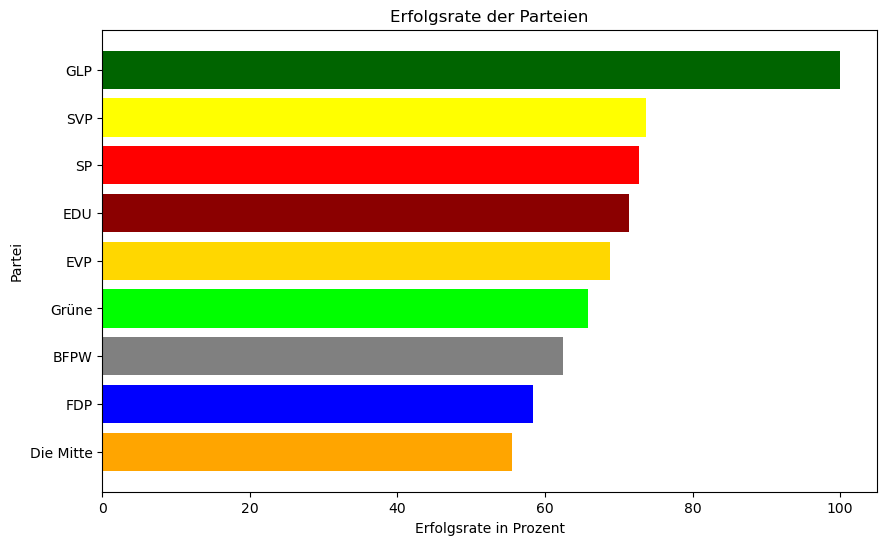

In [26]:
plt.figure(figsize=(10, 6))
color = [partei_farben[partei] for partei in df_parteien_erfolg['Partei']]
plt.barh(df_parteien_erfolg['Partei'], df_parteien_erfolg['Erfolgsrate'], color=color)
plt.title('Erfolgsrate der Parteien')
plt.xlabel('Erfolgsrate in Prozent')
plt.ylabel('Partei')
plt.show()

In Wädenswil bringen alle Parteien mehrheitlich die Vorstösse durch. Öffenen wir den Blick auf die Lager im Parlament. Dazu bündle ich die Parteien zu drei Lagern.

In [27]:
bürgerlich = ['SVP','FDP','BFPW']
mitte = ['Die Mitte', 'GLP','EVP','EDU']
links = ['SP','Grüne']

Ich erstelle eine neue Spalte in der Kopie von df_erfolg_gefiltert und ordne den Parteien mit der lamda Methode ein Lager zu. 

In [28]:
df_erfolg_gefiltert = df_erfolg_gefiltert.copy()
df_erfolg_gefiltert['Lager'] = df_erfolg_gefiltert['Partei'].apply(lambda x: 'bürgerlich' if x in bürgerlich else ('mitte' if x in mitte else 'links'))
df_erfolg_gefiltert.head(5)

,ID-Vorstoss,Partei,Status,Geschaeftsart,Erfolgreich,Nicht Erfolgreich,Lager
9,2,SP,Beantwortet,Postulat,True,False,links
131,4,Grüne,Abgeschrieben,Postulat,True,False,links
132,4,SP,Abgeschrieben,Postulat,True,False,links
396,12,Die Mitte,Nicht überwiesen,Postulat,False,True,mitte
615,18,EVP,Nicht überwiesen,Postulat,False,True,mitte


Nun will ich sehen, wie erfolgreich welches Lager ist.

In [29]:
df_lager_erfolg = df_erfolg_gefiltert.groupby('Lager')[['Erfolgreich', 'Nicht Erfolgreich']].sum().reset_index()
df_lager_erfolg

,Lager,Erfolgreich,Nicht Erfolgreich
0,bürgerlich,26,13
1,links,67,29
2,mitte,29,15


Das stelle ich noch grafisch in einem Säulendiagramm dar, geordnet von politisch links nach politisch rechts.

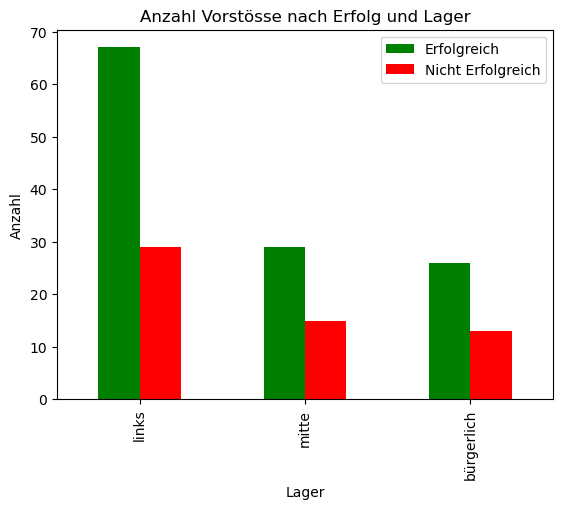

In [30]:
ax = df_lager_erfolg.set_index('Lager').loc[['links', 'mitte', 'bürgerlich']].plot(kind='bar', color=['green', 'red'])
plt.title('Anzahl Vorstösse nach Erfolg und Lager')
plt.xlabel('Lager')
plt.ylabel('Anzahl')
plt.legend(["Erfolgreich", "Nicht Erfolgreich"])
plt.show()

Die Grafik zeigt, dass die Ausgangsthese nicht stimmt: In Wädenswil dominieren weder die linken noch die Bürgerlichen. Eine so klare Aussage wie in Adliswil ist hier nicht möglich. Als Letztes bringe ich nun noch das Sitzverhältnis ins Spiel. Ich greife dazu auf ein csv-File zurück, das die Sitzverteilung nach Lagern zeigt. Dieses habe ich ebenfalls anhand der Listen, die ich von der Stadt Wädenswil erhalten habe, erstellt.

In [31]:
path = "All_Datas/Lagerstärke_Wädenswil.csv"
df_lagerstaerke = pd.read_csv(path)
df_lagerstaerke.set_index('Jahr', inplace=True)
df_lagerstaerke.head(10)

,links,mitte,bürgerlich
Jahr,,,
2006,10,8,17
2010,10,8,17
2014,9,10,16
2018,11,10,14
2022,11,9,15


Diese Tabelle sagt eigentlich schon alles. Dennoch plotte ich es in ein Liniendiagram, das zeigt, dass die bürgerlichen Parteien in den letzten 5 Legislaturen unantastbar sind.

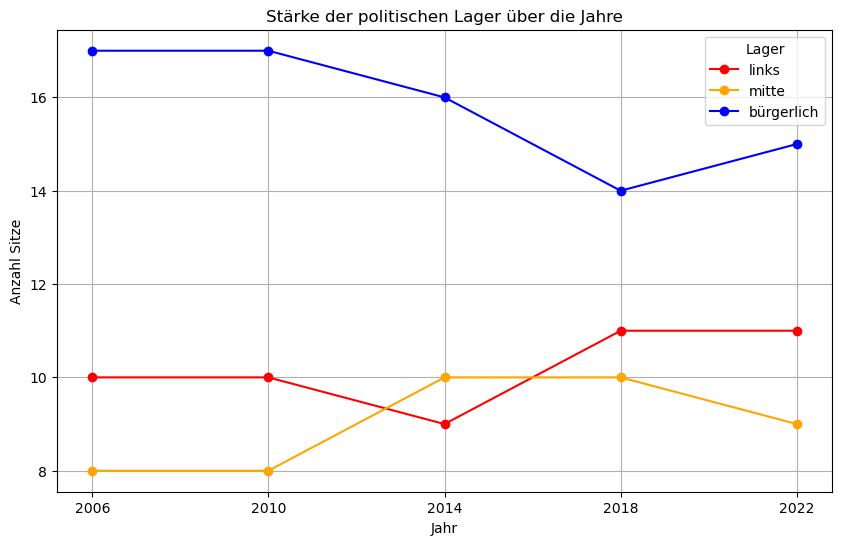

In [32]:
plt.figure(figsize=(10, 6))
# Hier mache ich ein Liniendiagramm für jedes Lager
plt.plot(df_lagerstaerke.index, df_lagerstaerke['links'], marker='o', label='links', color='red')
plt.plot(df_lagerstaerke.index, df_lagerstaerke['mitte'], marker='o', label='mitte', color='orange')
plt.plot(df_lagerstaerke.index, df_lagerstaerke['bürgerlich'], marker='o', label='bürgerlich', color='blue')

# Und füge Titel und Beschriftungen hinzu
plt.title('Stärke der politischen Lager über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Sitze')
plt.legend(title='Lager')
plt.xticks(df_lagerstaerke.index)
plt.grid(True)
plt.show()

Fazit Kapitel 2: Die Linken haben im Wädenswiler Parlament seit 2006 am meisten Vorstösse eingereicht und entsprechend die meisten erfolgreichen, wie nicht erfolgreichen. Auch die Mitte und die Bürgerlichen haben mehr erfolgreiche Vorstösse als nicht erfolgreiche. Dies, obwohl die Bürgerlichen in Wädenswil klar mehr Sitze haben. Es lässt sich hier kein wirklicher Trend oder eine überraschende Aussage herauslesen.

## 3. Welches sind die "fleissigsten" Parlamentarier/innen - und wie erfolgreich sind sie?

Um herauszufinden, wer die Parlamentarier/innen mit den meisten Vorstössen sind, merge ich zuerst das Dataframe df_ID mit df_parlamentarier zum neuen Dataframe df_namen

In [33]:
df_namen = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Name','Partei','ID-Vorstoss']]
df_namen.head(3)

,Name,Partei,ID-Vorstoss
0,Reiter Ulrich,Grüne,1
1,Rita Hug,SP,1
2,Claudia Bühlmann,Grüne,1


Ich zähle mit value_counts() wie oft welcher Name vorkommt. Aus dem Resultat mache ich gleich wieder ein Dataframe. Das ist nötig für einen Trick, den ich gleich bei der Grafik anwenden will.

In [34]:
df_namen_count = df_namen['Name'].value_counts().reset_index()
df_namen_count = df_namen_count.rename(columns={'index': 'Name', 'Name': 'Count'})
df_namen_count.head(3)

,Name,Count
0,Rita Hug,73
1,Baer Charlotte,59
2,Sandy Bossert,49


Ich will nun nämlich nicht nur die 25 Politiker/innen mit den meisten Vorstössen in einem Säulendiagramm darstellen, sondern die einzelnen Säulen der Parlamentarier/innen in der Farbe ihrer Partei erscheinen lassen.

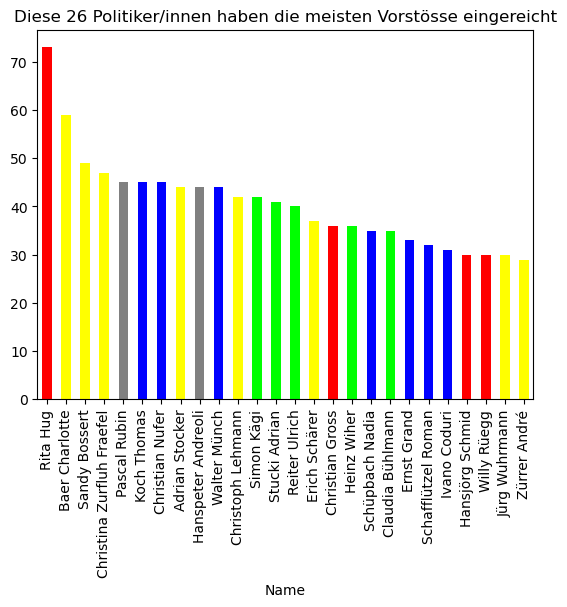

In [35]:
# Dafür definiere ich zuerst die Farben (analog Kapitel 1, wo ich sie bereits definiert habe)
farben = [partei_farben[df_namen.loc[df_namen['Name'] == name, 'Partei'].iloc[0]] for name in df_namen_count['Name']]

# Danach plotte ich die Grafik und nehme noch die Legende raus (da dort sonst "Name" steht, was irritiert)
ax = df_namen_count.head(26).plot(kind='bar', color=farben, x='Name', y='Count')
ax.legend().set_visible(False)
ax.set_title('Diese 26 Politiker/innen haben die meisten Vorstösse eingereicht')

plt.show()

Viel Vorstösse einreichen kann jeder. Nun will ich wissen, welche Politker/in auch am häufigsten Erfolg mit den Vorstössen hatte. Dafür erstelle ich als erstes ein neues Dataframe mit weiteren Spalten aus dem Dataframe "df_vorstoesse".

In [36]:
df_erfolg_namen = df_namen.merge(df_vorstoesse, left_on = 'ID-Vorstoss', right_on='ID-Vorstoss', how='right')[['ID-Vorstoss','Name','Partei','Status','Geschaeftsart']].drop_duplicates()
df_erfolg_namen.head(5)

,ID-Vorstoss,Name,Partei,Status,Geschaeftsart
0,1,Reiter Ulrich,Grüne,Erledigt,Interpellation
1,1,Rita Hug,SP,Erledigt,Interpellation
2,1,Claudia Bühlmann,Grüne,Erledigt,Interpellation
9,2,Willy Rüegg,SP,Beantwortet,Postulat
10,3,Baer Charlotte,SVP,Erledigt,Interpellation


Wie schon im Code von Kapitel 2 filtere ich auch hier zuerst die unnötigen Geschäftsarten raus.

In [37]:
df_erfolg_namen_filt = df_erfolg_namen[df_erfolg_namen['Geschaeftsart'].isin(['Motion', 'Postulat', 'Dringliches Postulat', 'Parlamentarische Initiative'])]
df_erfolg_namen_filt.head(5)

,ID-Vorstoss,Name,Partei,Status,Geschaeftsart
9,2,Willy Rüegg,SP,Beantwortet,Postulat
131,4,Reiter Ulrich,Grüne,Abgeschrieben,Postulat
132,4,Rita Hug,SP,Abgeschrieben,Postulat
133,4,Claudia Bühlmann,Grüne,Abgeschrieben,Postulat
396,12,Kuno Spirig,Die Mitte,Nicht überwiesen,Postulat


Danach teile ich den Status wie in Kapitel 2 auch hier in erfolgreich und nicht erfolgreich ein. Anstatt nach Partei weise ich hier das Ergebnis aber nach Namen aus.

In [38]:
df_erfolg_namen_filt = df_erfolg_namen_filt.copy()
df_erfolg_namen_filt['Erfolgreich'] = df_erfolg_namen_filt['Status'].isin(erfolgreich)
df_erfolg_namen_filt['Nicht Erfolgreich'] = df_erfolg_namen_filt['Status'].isin(nicht_erfolgreich)
df_namen_erfolg = df_erfolg_namen_filt.groupby('Name')[['Erfolgreich', 'Nicht Erfolgreich']].sum().reset_index()
df_namen_erfolg.head(3)

,Name,Erfolgreich,Nicht Erfolgreich
0,Adrian Stocker,6,4
1,Andreas Gut,3,1
2,Astrid Furrer,2,2


Nun will ich sehen, wer am meisten Vorstösse erfolgreich durchgebracht hat. Ich rechne dazu die erfolgreichen minus die nicht erfolgreichen Vorstösse. Das Resultat lasse ich in der Spalte "Erfolg kumuliert" anzeigen.

In [39]:
df_namen_erfolg['Erfolg kumuliert'] = df_namen_erfolg['Erfolgreich'] - df_namen_erfolg['Nicht Erfolgreich']
df_namen_erfolg.sort_values(by='Erfolg kumuliert', ascending=False).head(5)

,Name,Erfolgreich,Nicht Erfolgreich,Erfolg kumuliert
77,Rita Hug,19,5,14
86,Simon Kägi,13,4,9
87,Stucki Adrian,13,4,9
12,Christian Gross,6,0,6
18,Claudia Bühlmann,7,1,6


Ich will nun sehen, wie erfolgreich die 25 Politiker/innen mit den meisten Vorstössen sind. Die Reihenfolge soll in der nächsten Grafik also die selbe sein, wie jene oben. Ich merge dazu den Erfolg kumuliert mit der Spalte Count aus dem obigen Dataframe zusammen.

In [40]:
df_erfolg_final = df_namen_count.merge(df_namen_erfolg, left_on = 'Name', right_on='Name', how='right')[['Name','Erfolg kumuliert','Count']].drop_duplicates()
df_erfolg_final.head()

,Name,Erfolg kumuliert,Count
0,Adrian Stocker,2,44
1,Andreas Gut,2,12
2,Astrid Furrer,0,19
3,Aurel Greter,0,5
4,Bachmann Severin,0,7


Nun kann ich eine Grafik erstellen, die sich an der Reihenfolge von Count orientiert aber die Werte von Erfolg kumuliert ausgibt. Danach definiere ich die x-Achse nochmals neu, sodass mir nicht die Anzahl "Counts" ausgewiesen wird, sondern die entsprechenden Namen.

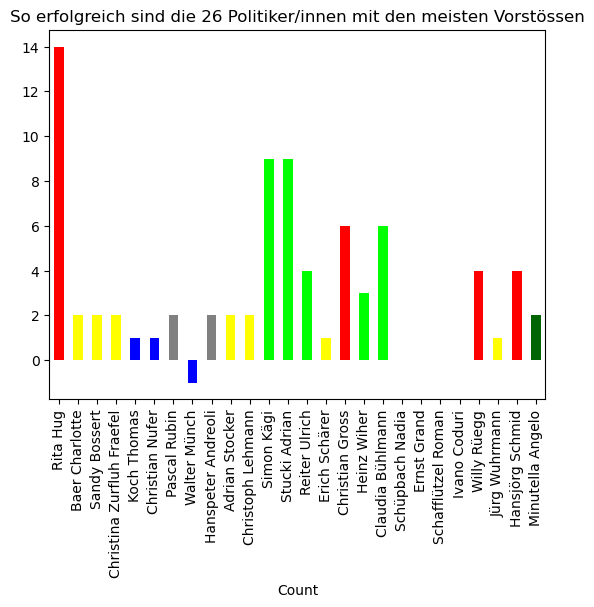

In [41]:
df_erfolg_final_sorted = df_erfolg_final.sort_values(by='Count', ascending=False).head(26)
# Ich definiere Farben, Achse und Beschriftungen
farben = [partei_farben[df_namen.loc[df_namen['Name'] == name, 'Partei'].iloc[0]] for name in df_erfolg_final_sorted['Name']]
ax = df_erfolg_final_sorted.plot(kind='bar', color=farben, x='Count', y='Erfolg kumuliert', legend=False)

ax.set_xticklabels(df_erfolg_final_sorted['Name'])
ax.set_title('So erfolgreich sind die 26 Politiker/innen mit den meisten Vorstössen')

plt.show()

Fazit Kapitel 3: Die vier "fleissigsten" Parlamentsmitglieder der letzten 17 Jahre sind alles Frauen, am erfolgreichsten ist mit Abstand Rita Hug. Es ist hier aber auch zu berücksichtigen, dass die Stadt nicht bei allen Vorstössen die Namen der Parlamentsmitglierder ausweist, sondern oftmals die Fraktionen. Es ist hier also schwierig zu sagen, welche Parlamentsmitglieder effektiv an wie vielen Vorstössen beteiligt waren. Dennoch lohnt sich sicher ein Gespräch mit Rita Hug und Charlotte Baer.

## 4. Wie viele Vorstösse stammen von Männern und wie viele von Frauen?

Ich füge als erstes die Dataframes df_ID und df_parlamentarier zusammen. Ich lasse mir Parteien und Geschlecht anzeigen.

In [42]:
df_geschlechter = df_ID.merge(df_parlamentarier, left_on='ID-Politiker', right_on='ID-Politiker', how='left')[['Partei','Geschlecht','ID-Vorstoss']]
df_geschlechter.head(5)

,Partei,Geschlecht,ID-Vorstoss
0,Grüne,m,1
1,SP,w,1
2,Grüne,w,1
3,SP,m,2
4,SVP,w,3


Danach zähle ich, welches Geschlecht wie oft vorkommt...

In [43]:
geschlechter_counts = df_geschlechter['Geschlecht'].value_counts()
geschlechter_counts

m    1339
w     512
Name: Geschlecht, dtype: int64

...und stelle die prozentualen Anteile in einem einfachen Kuchendiagramm dar.

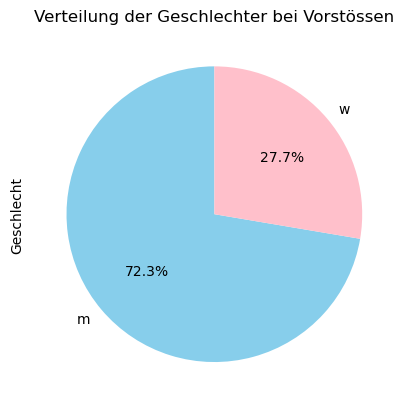

In [44]:
geschlechter_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Verteilung der Geschlechter bei Vorstössen')
plt.show()

Wir sehen also, dass nur an jedem fünften Vorstoss eine Frau beteiligt ist. Um etwas mehr als das aussagen zu können, möchte ich die Anzahl Vorstösse nach Geschlechter auf die einzelnen Parteien herunterbrechen.

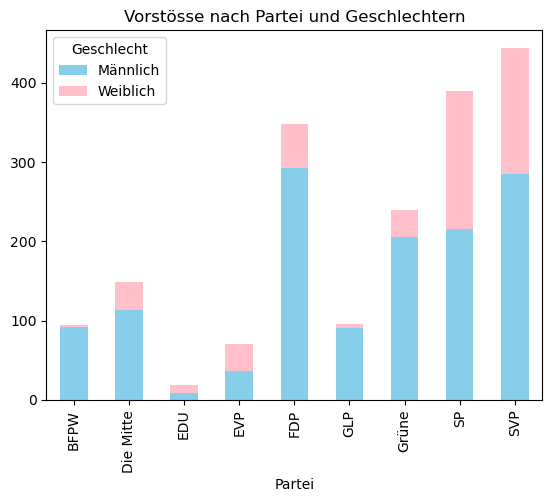

In [45]:
df_geschlechter.groupby(['Partei', 'Geschlecht']).count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Vorstösse nach Partei und Geschlechtern')
plt.legend(title='Geschlecht', labels=['Männlich', 'Weiblich'], loc='upper left')
plt.show()

Nun will ich die generelle Frauenquote der einzelnen Parteien im Parlament ermitteln. Dazu gruppiere ich das Dataframe df_parlamentarier zuerst nach Partei und Geschlect und suche dann mit der lambda Methode alle "w" heraus und berechne den Anteil mal 100, um auf die Prozente zu kommen.

In [46]:
df_geschlechtsanteil_partei = df_parlamentarier.groupby('Partei')['Geschlecht'].apply(lambda x: (x == 'w').mean() * 100).reset_index()
df_geschlechtsanteil_partei.columns = ['Partei', 'Anteil Frauen']
df_geschlechtsanteil_sortiert = df_geschlechtsanteil_partei.sort_values(['Anteil Frauen'],ascending=False)
df_geschlechtsanteil_sortiert

,Partei,Anteil Frauen
2,EDU,50.000000
7,SP,45.161290
3,EVP,27.272727
1,Die Mitte,21.052632
4,FDP,20.000000
6,Grüne,18.181818
8,SVP,14.814815
5,GLP,14.285714
0,BFPW,11.111111


Das Ganze lasse ich mir wiederum in einer Grafik anzeigen. Interessant ist, dass die SP zwar einen relativ hohen Frauenanteil im Parlament hat, an den Vorstössen aber in der Regel Männer beteiligt sind. Bei der SVP ist es umgekehrt. Das will ich ebenfalls zeigen. Ich füge also zwei Achsen in die Grafik ein.

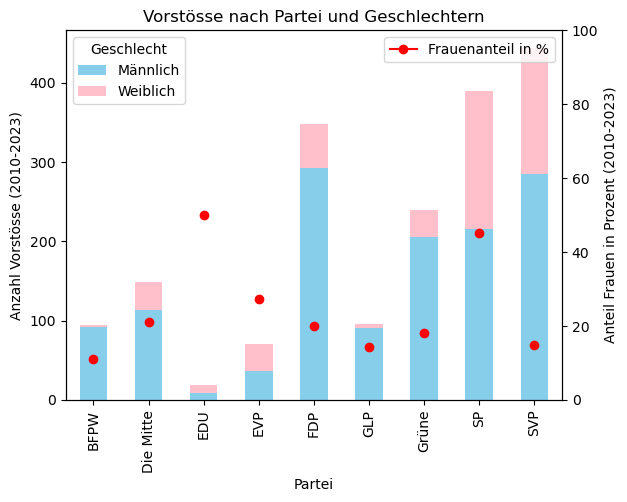

In [47]:
# Zuerst definiere ich, dass es zwei Elemente in der Grafik gegen wird.
fig, ax1 = plt.subplots()

# Dann werte ich die erste aus, setze die Metadaten und definiere sie als ax1.
df_geschlechter.groupby(['Partei', 'Geschlecht']).count().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'pink'], ax=ax1)
plt.title('Vorstösse nach Partei und Geschlechtern')
plt.legend(title='Geschlecht', labels=['Männlich', 'Weiblich'], loc='upper left')
ax1.set_ylabel('Anzahl Vorstösse (2010-2023)')

# Ich definiere das zweites Diagramm
ax2 = ax1.twinx()

# Mache die Auswertung zum durchschnittlichen Geschlechtsanteil (habe ich oben schon definiert)
df_geschlechtsanteil_sortiert.groupby(['Partei','Anteil Frauen']).plot(color='red', marker='o', ax=ax2)
ax2.legend(["Frauenanteil in %"], loc='upper right')
ax2.set_ylabel('Anteil Frauen in Prozent (2010-2023)')
ax2.set_ylim(0, 100)

# Und zeige das Diagramm an
plt.show()

Fazit: Obwohl die vier fleissigsten Parlamentsmitglieder alles Frauen waren, kommen im Wädenswiler Parlament dennoch viel mehr Vorstösse von Männern. Das hat sicherlich damit zu tun, dass in den meisten Parteien die Frauenquote eher tief ist. Und da in Wädenswil häufig die Fraktionen einen Vorstoss einreichen, sind damit automatisch weniger Frauen als Männer an den Vorstössen beteiligt.